# Generate manuscript figures

In [1]:
from pathlib import Path
import xarray as xr
import pandas as pd
import verde as vd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

## Load custom matplotlib configuration

In [2]:
plt.style.use(Path(".") / "matplotlib.rc")

/home/santi/.anaconda3/envs/default/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Define results directory

In [3]:
results_dir = Path("..") / "results"
ground_results_dir = results_dir / "ground_survey"
airborne_results_dir = results_dir / "airborne_survey"

/home/santi/.anaconda3/envs/default/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Ground survey

In [4]:
survey = pd.read_csv(ground_results_dir / "survey.csv")

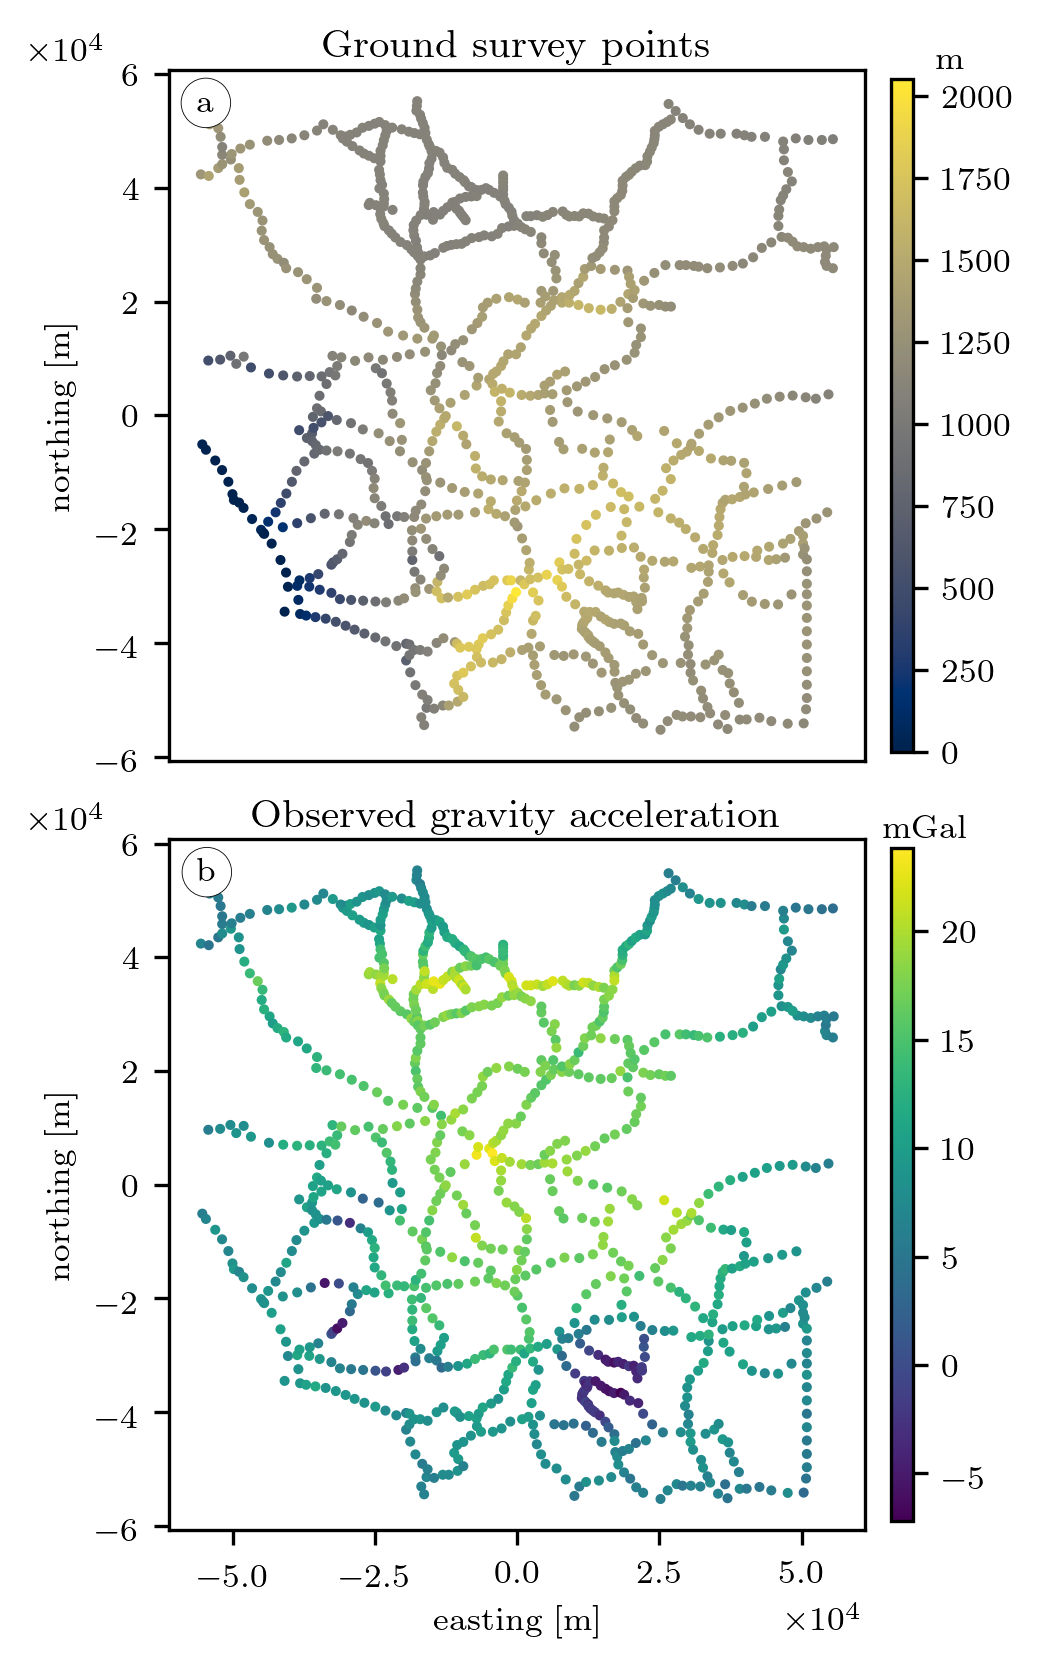

In [5]:
# Define useful parameters
width = 3.33
figsize = (width, width * 1.7)
cbar_shrink = 0.95
cbar_pad = 0.03
cbar_aspect = 30
size = 2
labels = "a b".split()

# Initialize figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=figsize)

# Plot survey points
tmp = ax1.scatter(
    survey.easting, survey.northing, c=survey.height, cmap="cividis", s=size
)
clb = plt.colorbar(
    tmp,
    ax=ax1,
    shrink=cbar_shrink,
    orientation="vertical",
    pad=cbar_pad,
    aspect=cbar_aspect,
)
clb.set_label("m", labelpad=-15, y=1.05, rotation=0)

# Plot measured values
tmp = ax2.scatter(survey.easting, survey.northing, c=survey.g_z, cmap="viridis", s=size)
clb = plt.colorbar(
    tmp,
    ax=ax2,
    shrink=cbar_shrink,
    orientation="vertical",
    pad=cbar_pad,
    aspect=cbar_aspect,
)
clb.set_label("mGal", labelpad=-15, y=1.05, rotation=0)


ax2.set_xlabel("easting [m]")
ax1.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False,
)

for ax, label in zip((ax1, ax2), labels):
    ax.set_aspect("equal")
    ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    ax.set_ylabel("northing [m]")
    ax.yaxis.offsetText.set_x(-0.2)
    ax.annotate(
        label,
        xy=(0.04, 0.94),
        xycoords="axes fraction",
        bbox=dict(boxstyle="circle", fc="white", lw=0.2),
    )

ax1.set_title("Ground survey points", pad=3)
ax2.set_title("Observed gravity acceleration", pad=3)


plt.tight_layout(h_pad=0.2)
plt.savefig(
    Path("..") / "manuscript" / "figs" / "ground-survey.pdf",
    bbox_inches="tight",
    dpi=300,
)

## Airborne survey

In [6]:
survey = pd.read_csv(airborne_results_dir / "survey.csv")

/home/santi/.anaconda3/envs/default/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


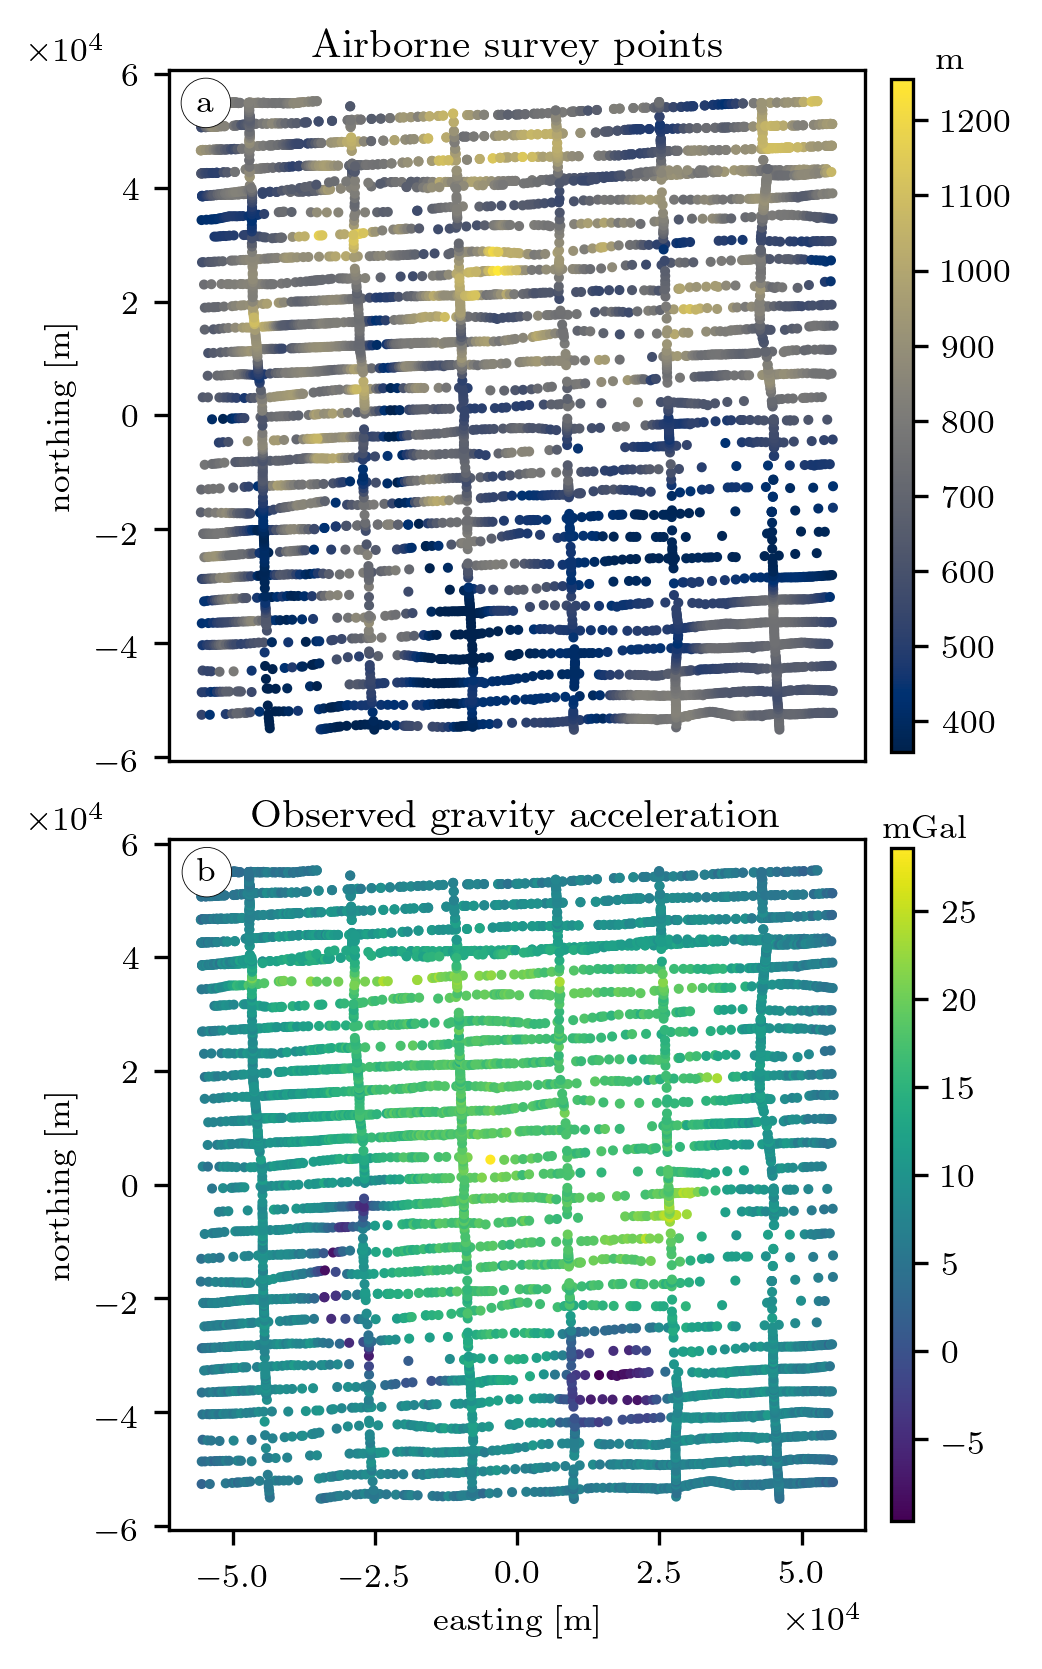

In [7]:
# Define useful parameters
width = 3.33
figsize = (width, width * 1.7)
cbar_shrink = 0.95
cbar_pad = 0.03
cbar_aspect = 30
size = 2
labels = "a b".split()

# Initialize figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=figsize)

# Plot survey points
tmp = ax1.scatter(
    survey.easting, survey.northing, c=survey.height, cmap="cividis", s=size
)
clb = plt.colorbar(
    tmp, ax=ax1, shrink=cbar_shrink, orientation="vertical", pad=0.03, aspect=30
)
clb.set_label("m", labelpad=-15, y=1.05, rotation=0)

# Plot measured values
tmp = ax2.scatter(survey.easting, survey.northing, c=survey.g_z, cmap="viridis", s=size)
clb = plt.colorbar(
    tmp, ax=ax2, shrink=cbar_shrink, orientation="vertical", pad=0.03, aspect=30
)
clb.set_label("mGal", labelpad=-15, y=1.05, rotation=0)

ax2.set_xlabel("easting [m]")
ax1.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False,
)

for ax, label in zip((ax1, ax2), labels):
    ax.set_aspect("equal")
    ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    ax.set_ylabel("northing [m]")
    ax.yaxis.offsetText.set_x(-0.2)
    ax.annotate(
        label,
        xy=(0.04, 0.94),
        xycoords="axes fraction",
        bbox=dict(boxstyle="circle", fc="white", lw=0.2),
    )

ax1.set_title("Airborne survey points", pad=3)
ax2.set_title("Observed gravity acceleration", pad=3)

plt.tight_layout(h_pad=0.2)
plt.savefig(
    Path("..") / "manuscript" / "figs" / "airborne-survey.pdf",
    bbox_inches="tight",
    dpi=300,
)

## Target grid

In [8]:
target = xr.open_dataarray(results_dir / "target.nc")

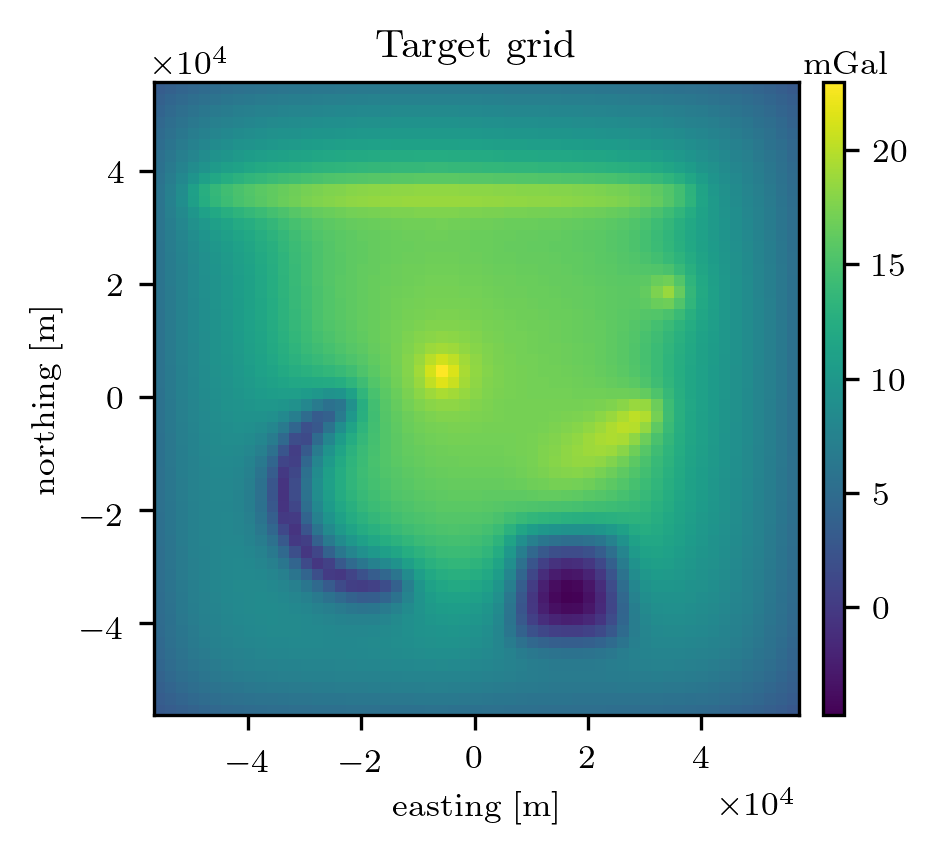

In [9]:
width = 3.33
figsize = (width, width * 0.85)
fig, ax = plt.subplots(figsize=figsize)

tmp = target.plot.pcolormesh(
    ax=ax, add_colorbar=False, cmap="viridis", center=False, rasterized=True
)
ax.set_aspect("equal")
ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
ax.set_xlabel(ax.get_xlabel() + " [m]")
ax.set_ylabel(ax.get_ylabel() + " [m]")
clb = plt.colorbar(tmp, ax=ax, shrink=1, orientation="vertical", pad=0.03, aspect=30)
clb.set_label("mGal", labelpad=-15, y=1.05, rotation=0)

ax.set_title("Target grid")
plt.tight_layout()
plt.savefig(
    Path("..") / "manuscript" / "figs" / "target-grid.pdf",
    bbox_inches="tight",
    dpi=300,
)
plt.show()

## Gridding ground survey

In [10]:
layouts = ["source_below_data", "block_averaged_sources", "grid_sources"]
field_units = "mGal"

best_predictions = []
for layout in layouts:
    best_predictions.append(
        xr.open_dataset(ground_results_dir / "best_predictions-{}.nc".format(layout))
    )

<ipython-input-11-44d6920a7511>:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


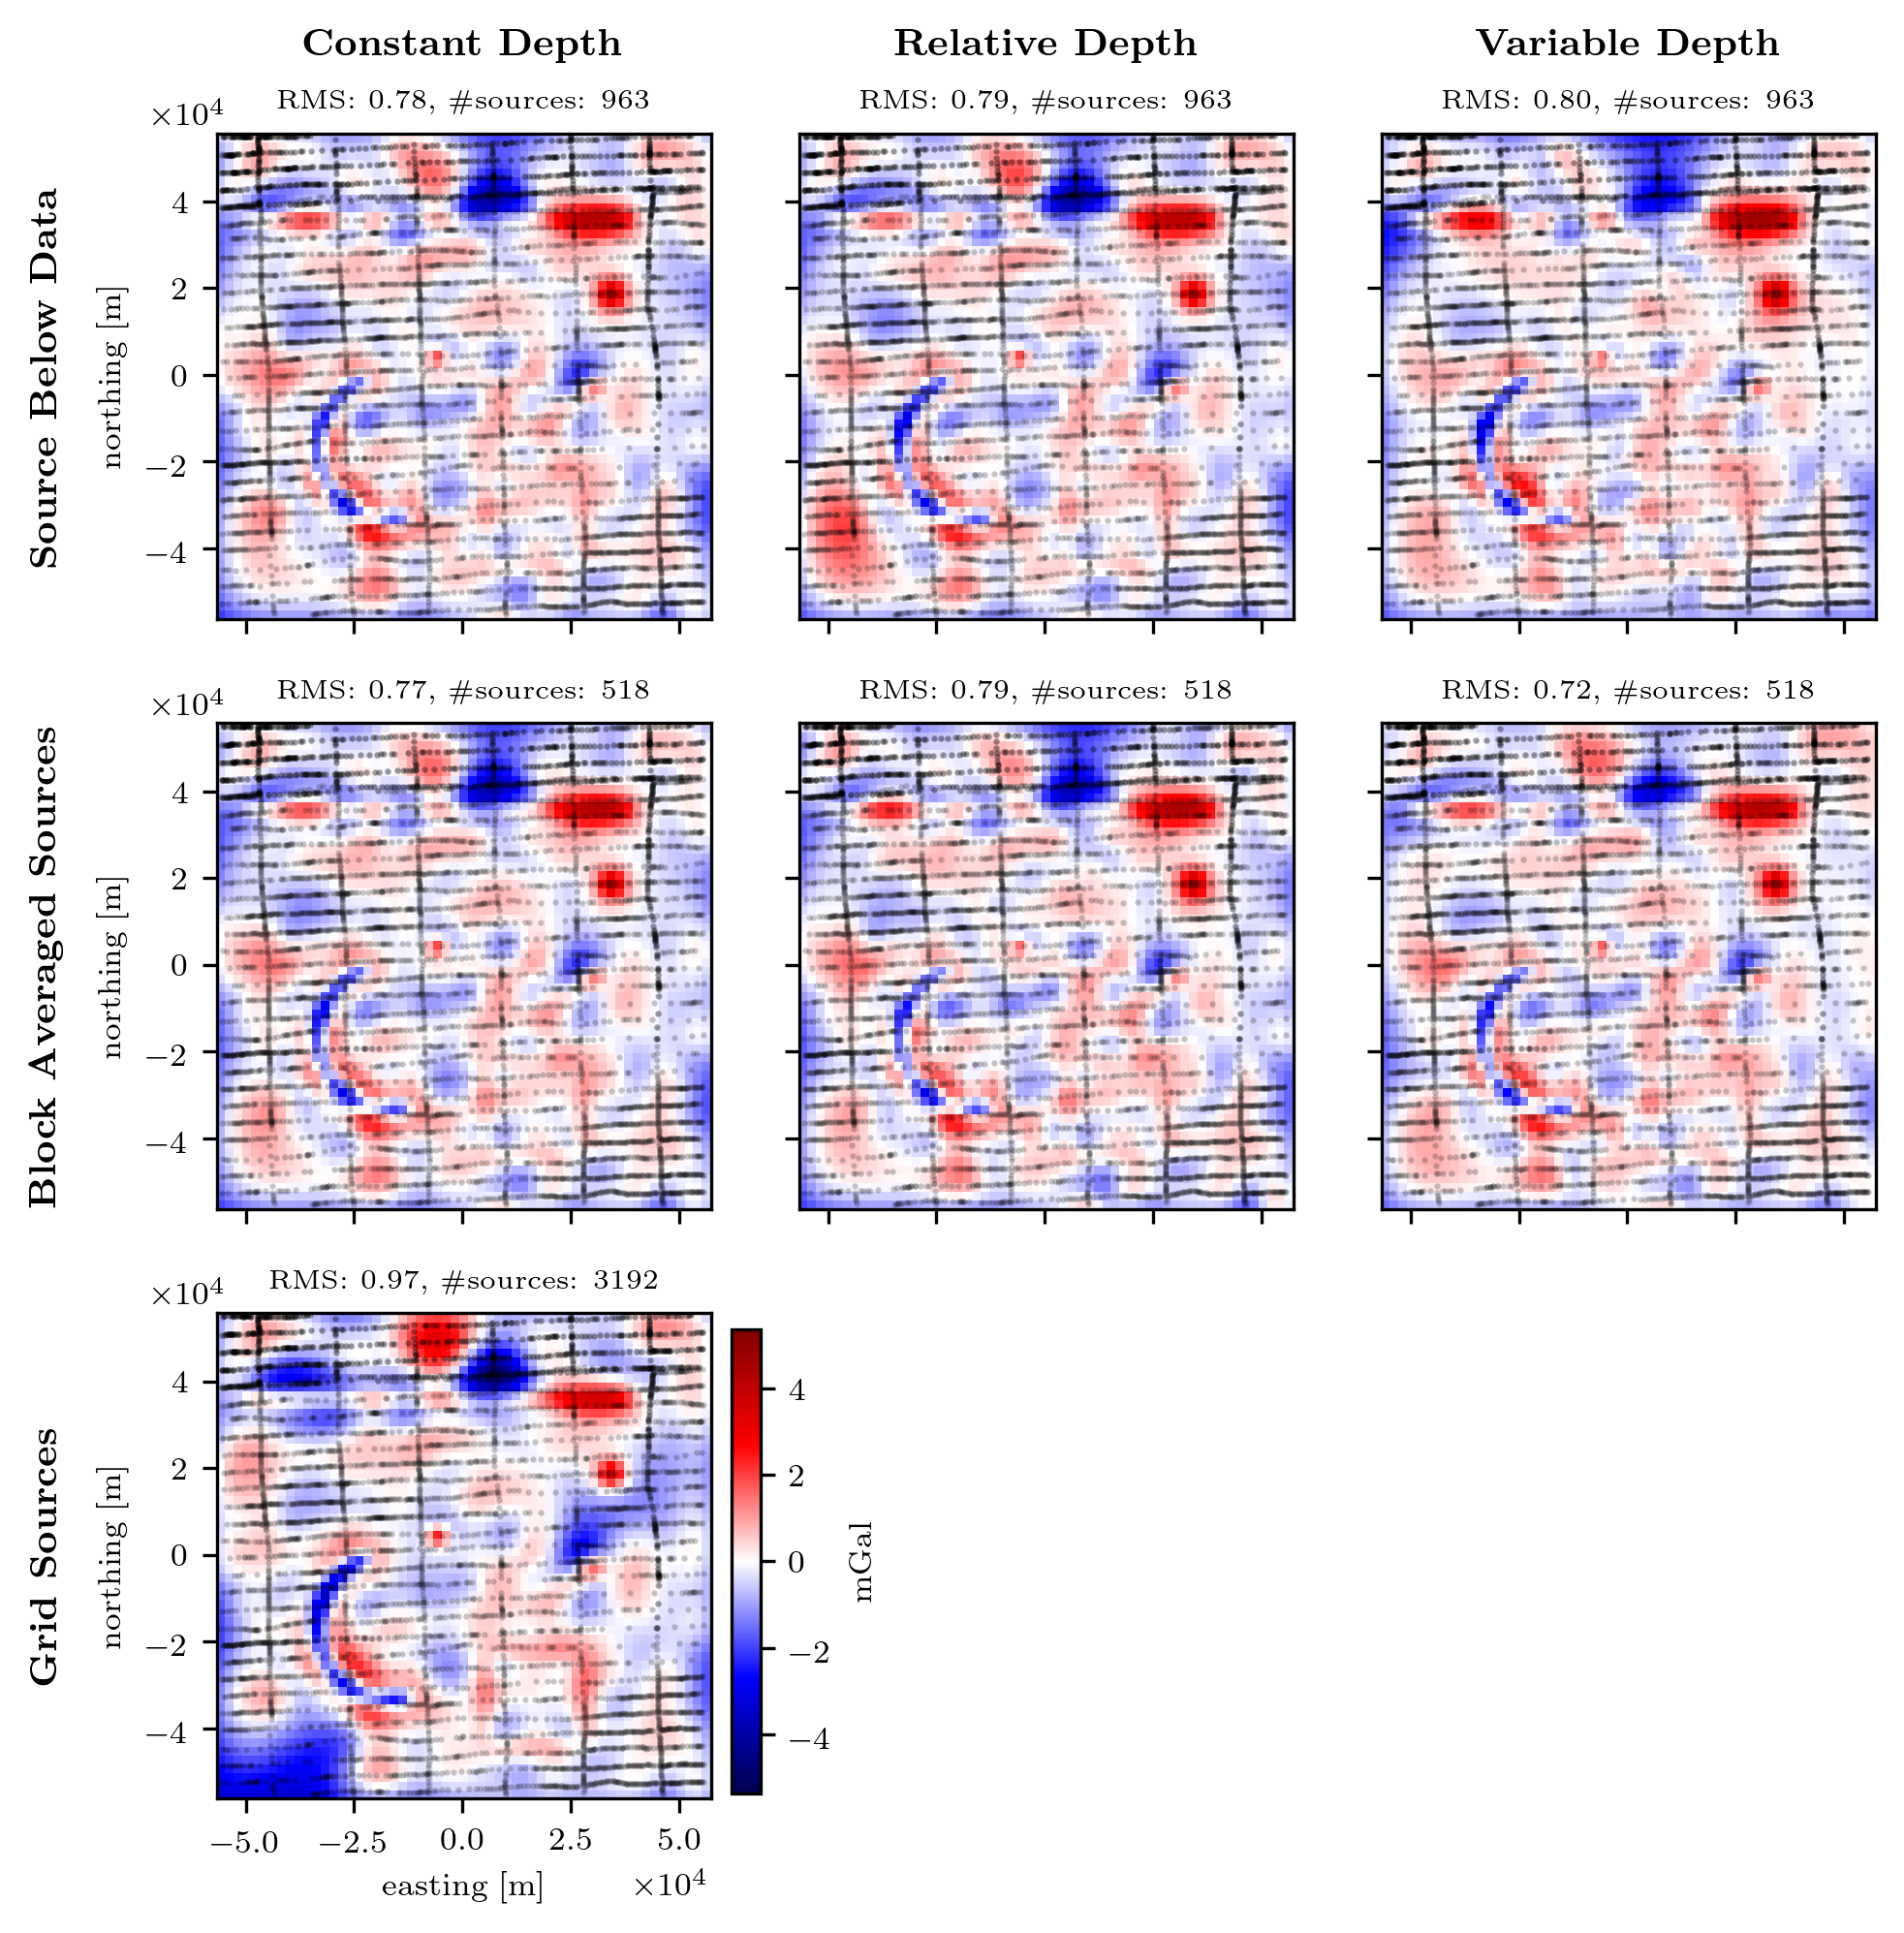

In [11]:
# We will use the same boundary value for each plot in order to
# show them with the same color scale.
vmax = vd.maxabs(
    *list(
        target - dataset[depth_type]
        for dataset in best_predictions
        for depth_type in dataset
    )
)

# Initialize figure
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(6.66, 6.66), sharex=True, sharey=True
)

# Plot the differences between the target and the best prediction for each layout
for i, (ax_row, dataset) in enumerate(zip(axes, best_predictions)):
    for j, (ax, depth_type) in enumerate(zip(ax_row, dataset)):
        prediction = dataset[depth_type]
        difference = target - prediction
        tmp = difference.plot.pcolormesh(
            ax=ax,
            vmin=-vmax,
            vmax=vmax,
            cmap="seismic",
            add_colorbar=False,
            rasterized=True,
        )
        ax.scatter(survey.easting, survey.northing, s=0.3, alpha=0.2, color="k")
        ax.set_aspect("equal")
        # Set scientific notation on axis labels (and change offset text position)
        ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
        ax.yaxis.offsetText.set_x(-0.13)
        ax.set_xlabel(ax.get_xlabel() + " [m]")
        ax.set_ylabel(ax.get_ylabel() + " [m]")
        # Set title with RMS and number of points
        ax.set_title(
            r"RMS: {:.2f}, \#sources: {}".format(prediction.rms, prediction.n_points),
            fontsize="small",
            horizontalalignment="center",
        )

        # Annotate the columns of the figure
        if i == 0:
            ax.text(
                0.5,
                1.16,
                r"\textbf{{" + depth_type.replace("_", " ").title() + r"}}",
                fontsize="large",
                fontweight="bold",
                horizontalalignment="center",
                transform=ax.transAxes,
            )
        # Annotate the rows of the figure
        if j == 0:
            ax.text(
                -0.38,
                0.5,
                r"\textbf{{" + dataset.layout.replace("_", " ").title() + r"}}",
                fontsize="large",
                fontweight="bold",
                verticalalignment="center",
                rotation="vertical",
                transform=ax.transAxes,
            )
        # Remove xlabels and ylabels from inner axes
        if i != 2:
            ax.set_xlabel("")
        if j != 0:
            ax.set_ylabel("")

# Hide the last two axes because they are not used
axes[-1][-1].set_visible(False)
axes[-1][-2].set_visible(False)

# Add colorbar
cbar_ax = fig.add_axes([0.38, 0.075, 0.015, 0.24])
fig.colorbar(tmp, cax=cbar_ax, orientation="vertical", label=field_units)

plt.tight_layout()
plt.savefig(
    Path("..") / "manuscript" / "figs" / "ground_survey_differences.pdf", dpi=300
)
plt.show()

## Gridding airborne survey

In [12]:
layouts = ["source_below_data", "block_averaged_sources", "grid_sources"]
field_units = "mGal"

best_predictions = []
for layout in layouts:
    best_predictions.append(
        xr.open_dataset(airborne_results_dir / "best_predictions-{}.nc".format(layout))
    )

/home/santi/.anaconda3/envs/default/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-13-3ac45f62fd9c>:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


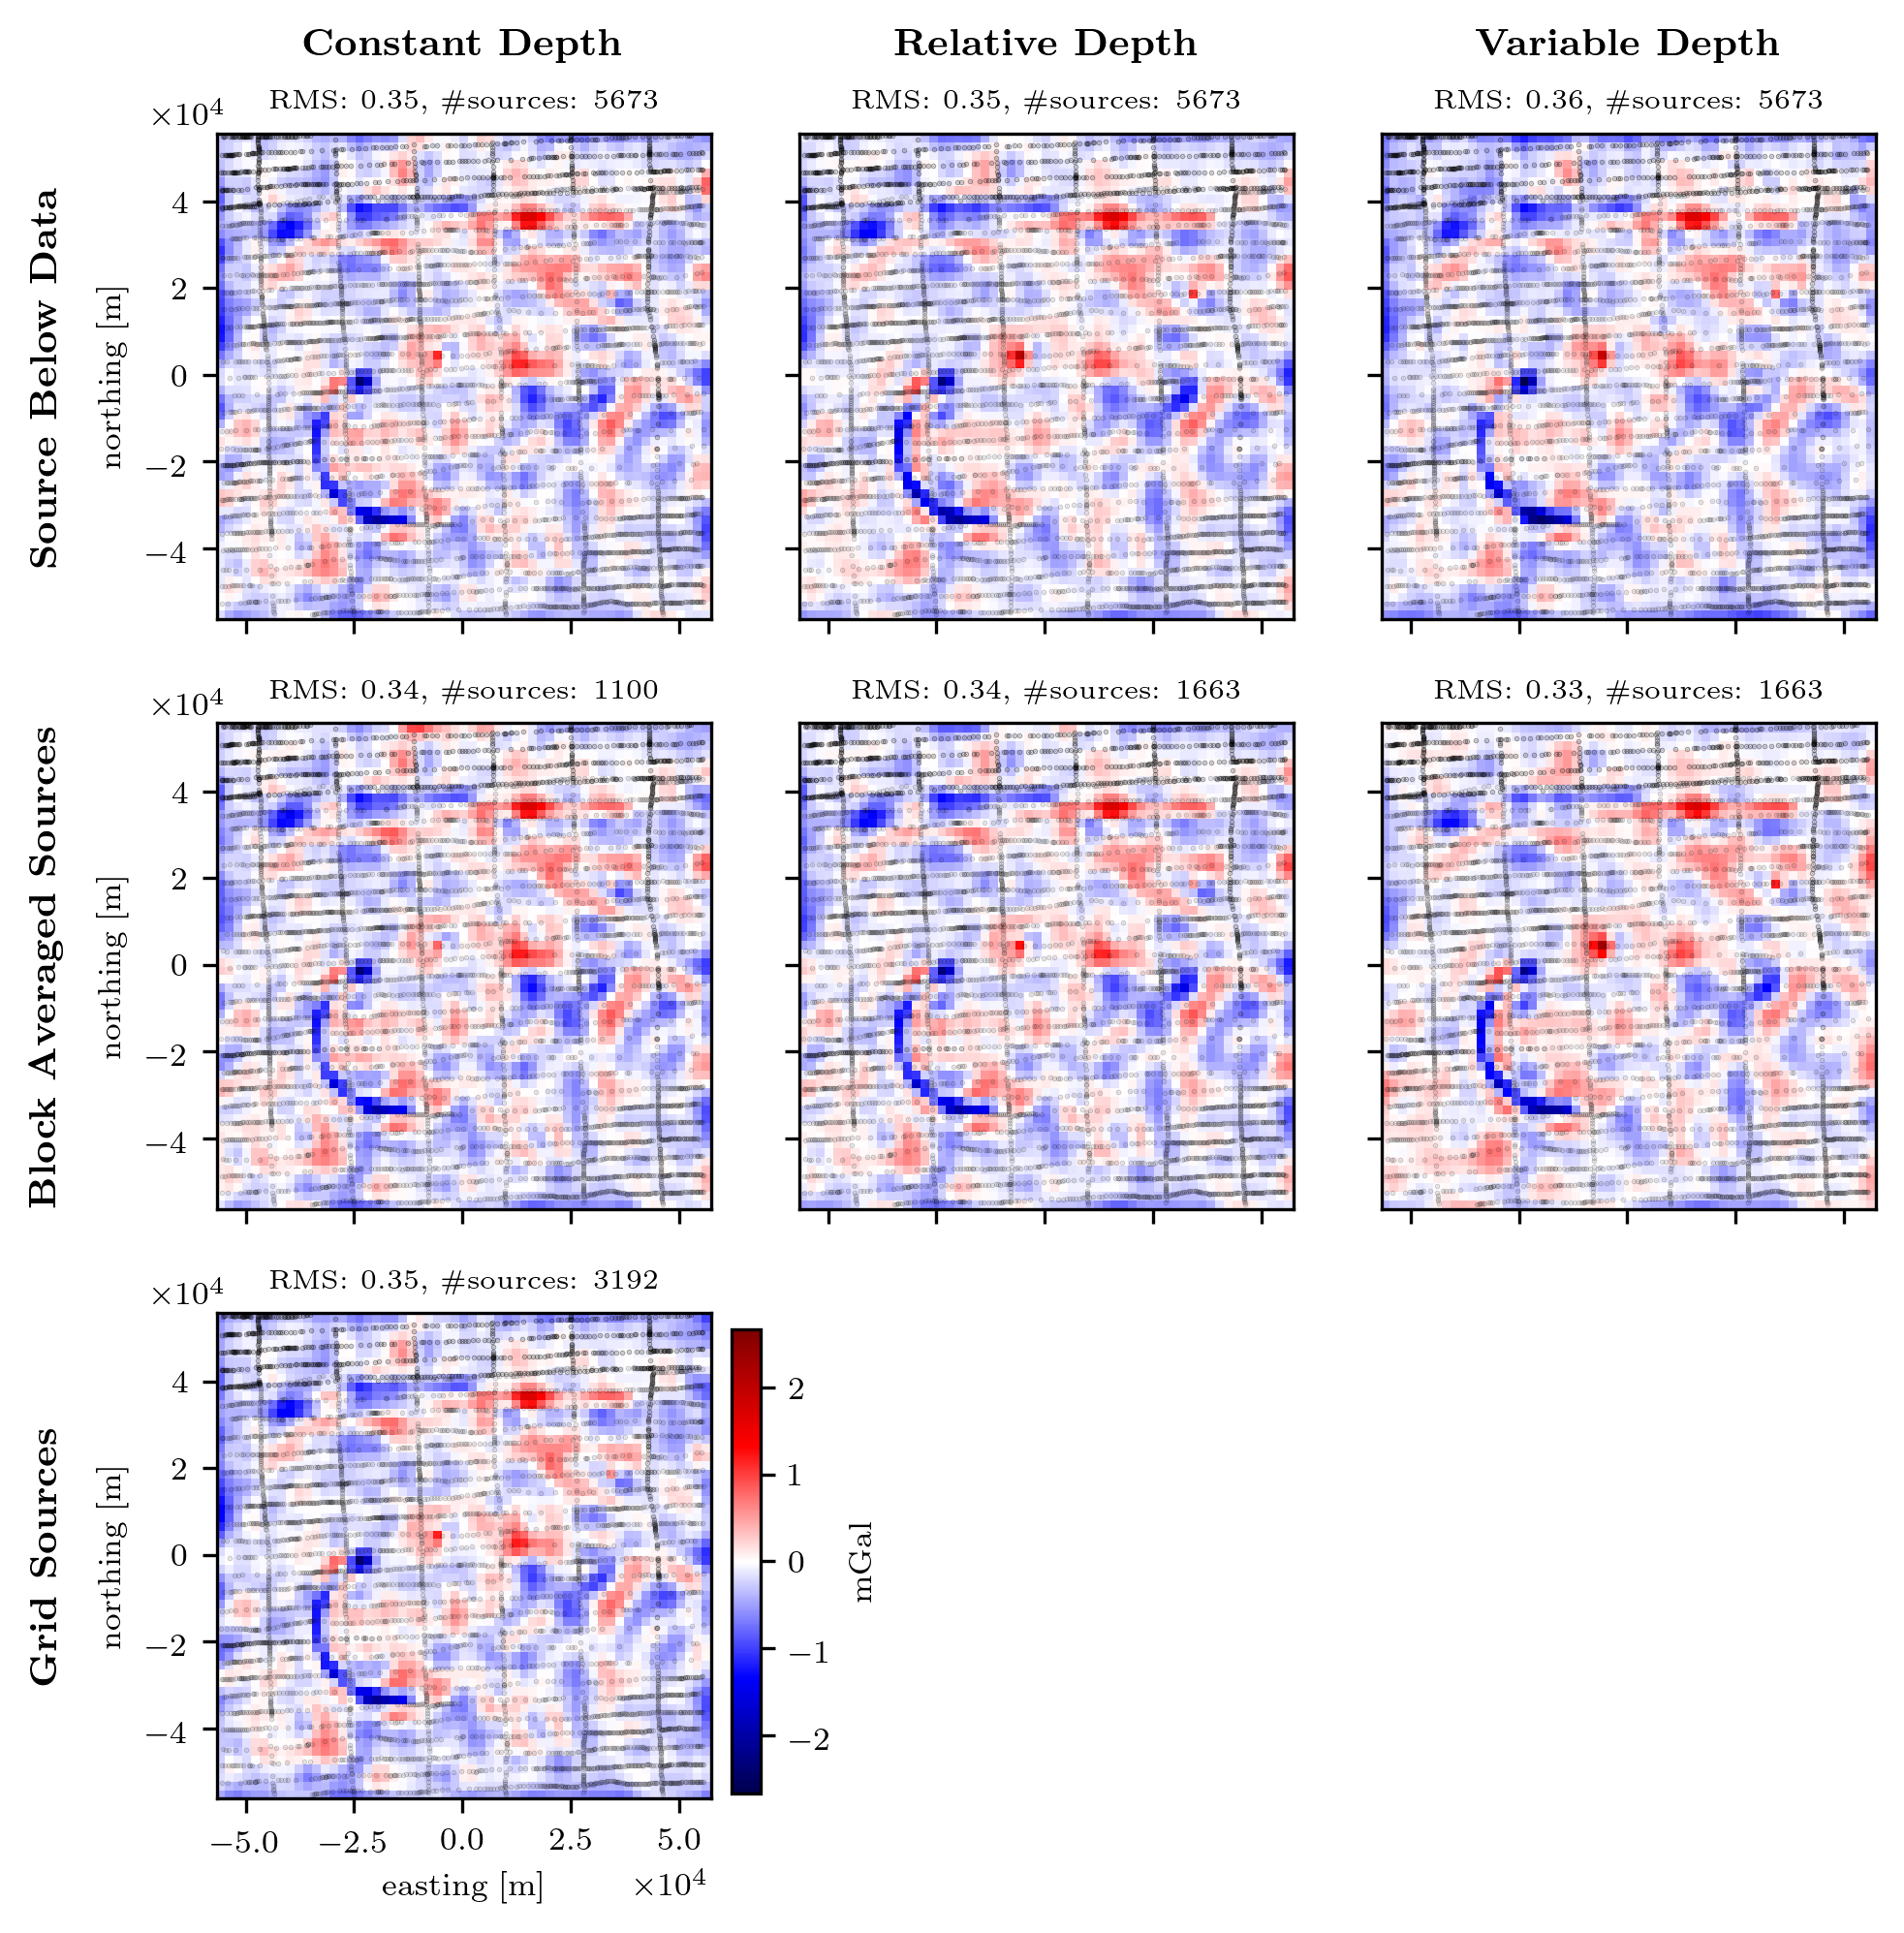

In [13]:
# We will use the same boundary value for each plot in order to
# show them with the same color scale.
vmax = vd.maxabs(
    *list(
        target - dataset[depth_type]
        for dataset in best_predictions
        for depth_type in dataset
    )
)

# Initialize figure
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(6.66, 6.66), sharex=True, sharey=True
)

# Plot the differences between the target and the best prediction for each layout
for i, (ax_row, dataset) in enumerate(zip(axes, best_predictions)):
    for j, (ax, depth_type) in enumerate(zip(ax_row, dataset)):
        prediction = dataset[depth_type]
        difference = target - prediction
        tmp = difference.plot.pcolormesh(
            ax=ax,
            vmin=-vmax,
            vmax=vmax,
            cmap="seismic",
            add_colorbar=False,
            rasterized=True,
        )
        ax.scatter(survey.easting, survey.northing, s=0.1, alpha=0.2, color="k")
        ax.set_aspect("equal")
        # Set scientific notation on axis labels (and change offset text position)
        ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
        ax.yaxis.offsetText.set_x(-0.13)
        ax.set_xlabel(ax.get_xlabel() + " [m]")
        ax.set_ylabel(ax.get_ylabel() + " [m]")
        # Set title with RMS and number of points
        ax.set_title(
            r"RMS: {:.2f}, \#sources: {}".format(prediction.rms, prediction.n_points),
            fontsize="small",
            horizontalalignment="center",
        )

        # Annotate the columns of the figure
        if i == 0:
            ax.text(
                0.5,
                1.16,
                r"\textbf{{" + depth_type.replace("_", " ").title() + r"}}",
                fontsize="large",
                fontweight="bold",
                horizontalalignment="center",
                transform=ax.transAxes,
            )
        # Annotate the rows of the figure
        if j == 0:
            ax.text(
                -0.38,
                0.5,
                r"\textbf{{" + dataset.layout.replace("_", " ").title() + r"}}",
                fontsize="large",
                fontweight="bold",
                verticalalignment="center",
                rotation="vertical",
                transform=ax.transAxes,
            )
        # Remove xlabels and ylabels from inner axes
        if i != 2:
            ax.set_xlabel("")
        if j != 0:
            ax.set_ylabel("")

# Hide the last two axes because they are not used
axes[-1][-1].set_visible(False)
axes[-1][-2].set_visible(False)

# Add colorbar
cbar_ax = fig.add_axes([0.38, 0.075, 0.015, 0.24])
fig.colorbar(tmp, cax=cbar_ax, orientation="vertical", label=field_units)

plt.tight_layout()
plt.savefig(
    Path("..") / "manuscript" / "figs" / "airborne_survey_differences.pdf", dpi=300
)
plt.show()

# Gradient boosted eqls: window size

In [14]:
eql_harmonic_results = pd.read_csv(
    results_dir / "gradient-boosted" / "eql_harmonic.csv"
)

eql_rms = eql_harmonic_results.rms.values[0]
eql_residue = eql_harmonic_results.residue.values[0]
eql_fitting_time = eql_harmonic_results.fitting_time.values[0]

In [15]:
boost_window_size = pd.read_csv(
    results_dir / "gradient-boosted" / "gradient-boosted-window-size.csv",
)

In [16]:
boost_window_size

window_size  window_size_ratio       rms   rms_std  fitting_time  \
0       2000.0           0.017857  1.041016  0.031366      4.374248   
1       5000.0           0.044643  0.755033  0.030150      1.514687   
2      10000.0           0.089286  0.664755  0.027253      0.404387   
3      20000.0           0.178571  0.626497  0.025284      0.197949   
4      30000.0           0.267857  0.572311  0.038128      0.104877   
5      40000.0           0.357143  0.463346  0.029237      0.149632   
6      50000.0           0.446429  0.480085  0.038187      0.096667   
7      60000.0           0.535714  0.463802  0.034780      0.186018   
8      70000.0           0.625000  0.470805  0.041373      0.152061   

   fitting_time_std  
0          0.020731  
1          0.011334  
2          0.004960  
3          0.011649  
4          0.007864  
5          0.023319  
6          0.009850  
7          0.012145  
8          0.007475

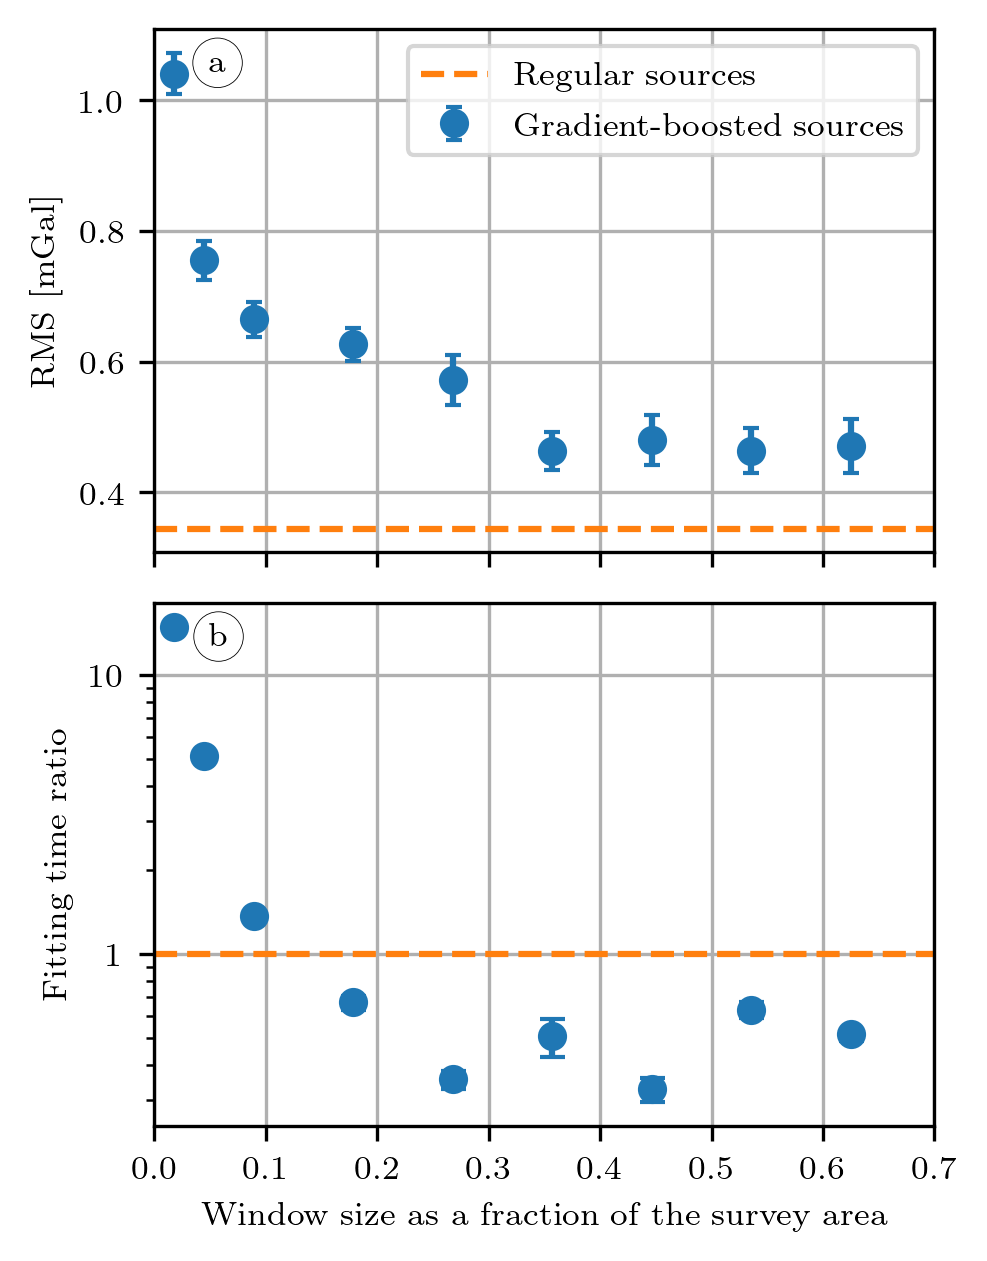

In [25]:
width = 3.33
figsize = (width, width * 0.85 * 1.5)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)
ax1.errorbar(
    boost_window_size.window_size_ratio,
    boost_window_size.rms,
    yerr=boost_window_size.rms_std,
    fmt="o",
    capsize=2,
    label="Gradient-boosted sources",
)
ax1.axhline(eql_rms, linestyle="--", color="C1", label="Regular sources")
ax1.set_ylabel("RMS [mGal]")
ax1.grid()
ax1.legend()

ax2.errorbar(
    boost_window_size.window_size_ratio,
    boost_window_size.fitting_time / eql_fitting_time,
    yerr=boost_window_size.fitting_time_std / eql_fitting_time,
    fmt="o",
    capsize=3,
)
ax2.axhline(1, linestyle="--", color="C1", label="Fitting time of EQLHarmonic")
ax2.set_xlabel("Window size as a fraction of the survey area")
ax2.set_ylabel("Fitting time ratio")
ax2.set_yscale("log")
ax2.set_xlim(0, 0.7)
ax2.grid()
ax2.yaxis.set_major_formatter(StrMethodFormatter("{x:g}"))
plt.tight_layout()
plt.savefig(
    Path("..") / "manuscript" / "figs" / "gradient-boosted-window-size.pdf", dpi=300
)
plt.show()

# Gradient boosted eqls: overlapping

In [18]:
boost_overlapping = pd.read_csv(
    results_dir / "gradient-boosted" / "gradient-boosted-overlapping.csv"
)

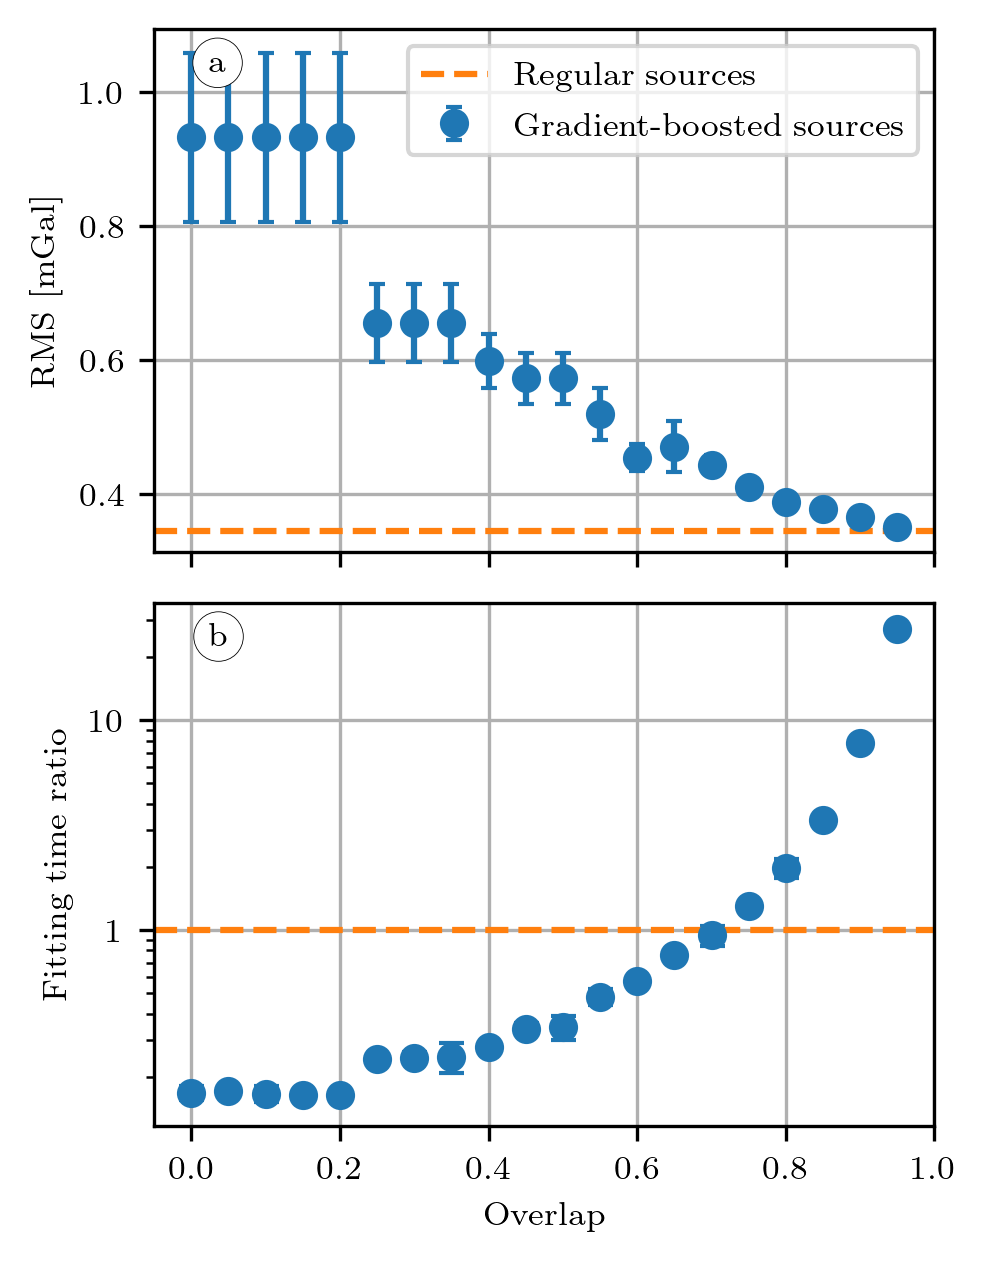

In [26]:
width = 3.33
figsize = (width, width * 0.85 * 1.5)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)

ax1.errorbar(
    boost_overlapping.overlaps,
    boost_overlapping.rms,
    yerr=boost_overlapping.rms_std,
    fmt="o",
    capsize=2,
    label="Gradient-boosted sources",
)
ax1.axhline(eql_rms, linestyle="--", color="C1", label="Regular sources")
ax1.set_ylabel("RMS [mGal]")
ax1.grid()
ax1.legend()

ax2.errorbar(
    boost_overlapping.overlaps,
    boost_overlapping.fitting_time / eql_fitting_time,
    yerr=boost_overlapping.fitting_time_std / eql_fitting_time,
    fmt="o",
    capsize=3,
)
ax2.axhline(1, linestyle="--", color="C1", label="Fitting time of EQLHarmonic")
ax2.set_xlabel("Overlap")
ax2.set_ylabel("Fitting time ratio")
ax2.set_yscale("log")
ax2.set_xlim(-0.05, 1)
ax2.grid()
ax2.yaxis.set_major_formatter(StrMethodFormatter("{x:g}"))
plt.tight_layout()
plt.savefig(
    Path("..") / "manuscript" / "figs" / "gradient-boosted-overlap.pdf", dpi=300
)
plt.show()